Importing Needed Libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset

In [174]:
tweets_df = pd.read_csv("e:\Data_Learning_Track_Tasks\Task2\materials\inconsistent_twitter_data.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\shossam\AppData\Local\Temp\ipykernel_7292\1863780349.py:1: SyntaxWarning: invalid escape sequence '\D'
  tweets_df = pd.read_csv("e:\Data_Learning_Track_Tasks\Task2\materials\inconsistent_twitter_data.csv")


From Excel, I changed the datatype for Tweet_Date to be short date type

In [176]:
tweets_df.head(20)

,Tweet_Date,Tweet_Text,Retweet_Count,Like_Count,Hashtags
0,1/1/2021,Tweet about MachineLearning,204.0,271.0,#ML
1,1/1/2021,Tweet about DeepLearning,46.0,306.0,#tech
2,1/1/2021,Tweet about Python,233.0,101.0,#ML
3,1/2/2021,Tweet about DeepLearning,298.0,203.0,#python
4,1/3/2021,Tweet about DataScience,376.0,502.0,#python
5,1/4/2021,Tweet about AI,183.0,123.0,#AI
6,1/5/2021,Tweet about AI,121.0,325.0,#ai
7,1/6/2021,Tweet about DataScience,440.0,331.0,#data
8,1/6/2021,Tweet about Python,190.0,316.0,#DATA
9,1/6/2021,Tweet about MachineLearning,443.0,133.0,#TECH


################## Data Exploration ##################

In [177]:
### Exploring Nulls and datatypes
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tweet_Date     510 non-null    object 
 1   Tweet_Text     510 non-null    object 
 2   Retweet_Count  490 non-null    float64
 3   Like_Count     495 non-null    float64
 4   Hashtags       510 non-null    object 
dtypes: float64(2), object(3)
memory usage: 20.1+ KB


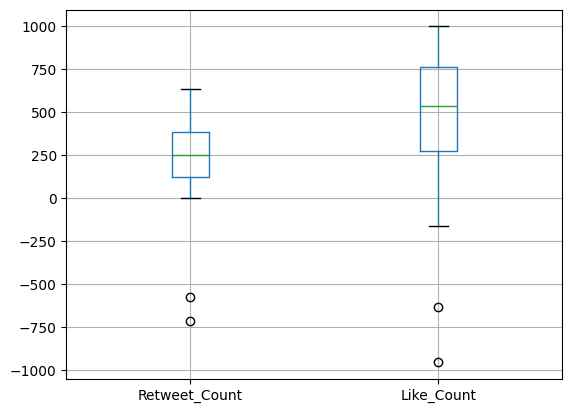

In [178]:
##### Exploring Duplicates
#tweets_df.duplicated()  #### No Duplicates found

#### Exploring Outliers
tweets_df.boxplot() ########## Outliers detected within Retweet Count and Like_count as negative values ##Drop as few outliers 
plt.show()
#tweets_df["Retweet_Count"].hist()

################ Data Cleansing ################

Splitting Tweet Date column to get rid of time

Changing Data type of Tweet_Date to datetime

In [179]:
tweets_df['Tweet_Date'] = pd.to_datetime(tweets_df['Tweet_Date'])
#tweets_df['Tweet_Time'] = pd.to_datetime(tweets_df['Tweet_Time'])
print(tweets_df.head(20))
print(tweets_df.info())

   Tweet_Date                     Tweet_Text  Retweet_Count  Like_Count  \
0  2021-01-01    Tweet about MachineLearning          204.0       271.0   
1  2021-01-01      Tweet about DeepLearning            46.0       306.0   
2  2021-01-01             Tweet about Python          233.0       101.0   
3  2021-01-02       Tweet about DeepLearning          298.0       203.0   
4  2021-01-03        Tweet about DataScience          376.0       502.0   
5  2021-01-04                Tweet about AI           183.0       123.0   
6  2021-01-05                Tweet about AI           121.0       325.0   
7  2021-01-06        Tweet about DataScience          440.0       331.0   
8  2021-01-06             Tweet about Python          190.0       316.0   
9  2021-01-06   Tweet about MachineLearning           443.0       133.0   
10 2021-01-07   Tweet about MachineLearning           478.0       413.0   
11 2021-01-07       Tweet about DeepLearning          400.0       786.0   
12 2021-01-09        Twee

Removing Nulls

In [180]:
### max 20 nulls are found within one column so Dropping data will not affect any further statistical Analysis
tweets_df.dropna(subset=['Retweet_Count', 'Like_Count'], inplace=True)

In [181]:
tweets_df.info() ####### Nulls or missing types removed successfully

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 509
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tweet_Date     475 non-null    datetime64[ns]
 1   Tweet_Text     475 non-null    object        
 2   Retweet_Count  475 non-null    float64       
 3   Like_Count     475 non-null    float64       
 4   Hashtags       475 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.3+ KB


Removing string paddings (White space)

In [182]:
tweets_df['Tweet_Text'] = tweets_df['Tweet_Text'].str.strip()
tweets_df.head(20)

,Tweet_Date,Tweet_Text,Retweet_Count,Like_Count,Hashtags
0,2021-01-01,Tweet about MachineLearning,204.0,271.0,#ML
1,2021-01-01,Tweet about DeepLearning,46.0,306.0,#tech
2,2021-01-01,Tweet about Python,233.0,101.0,#ML
3,2021-01-02,Tweet about DeepLearning,298.0,203.0,#python
4,2021-01-03,Tweet about DataScience,376.0,502.0,#python
5,2021-01-04,Tweet about AI,183.0,123.0,#AI
6,2021-01-05,Tweet about AI,121.0,325.0,#ai
7,2021-01-06,Tweet about DataScience,440.0,331.0,#data
8,2021-01-06,Tweet about Python,190.0,316.0,#DATA
9,2021-01-06,Tweet about MachineLearning,443.0,133.0,#TECH


Changing Hashtags to lower caps

In [183]:
tweets_df['Hashtags'] = tweets_df['Hashtags'].str.lower()
tweets_df.head(20)

,Tweet_Date,Tweet_Text,Retweet_Count,Like_Count,Hashtags
0,2021-01-01,Tweet about MachineLearning,204.0,271.0,#ml
1,2021-01-01,Tweet about DeepLearning,46.0,306.0,#tech
2,2021-01-01,Tweet about Python,233.0,101.0,#ml
3,2021-01-02,Tweet about DeepLearning,298.0,203.0,#python
4,2021-01-03,Tweet about DataScience,376.0,502.0,#python
5,2021-01-04,Tweet about AI,183.0,123.0,#ai
6,2021-01-05,Tweet about AI,121.0,325.0,#ai
7,2021-01-06,Tweet about DataScience,440.0,331.0,#data
8,2021-01-06,Tweet about Python,190.0,316.0,#data
9,2021-01-06,Tweet about MachineLearning,443.0,133.0,#tech


Dealing with Outliers by capping and substitute the values with lower bound

In [184]:
def capping_outliers(df, column, q1 = 0.05, q3 = 0.95):
    q1_val = df[column].quantile(q1)
    q3_val = df[column].quantile(q3)

    df[column] = df[column].clip(lower=q1_val,upper=q3_val)
    return df

tweets_df_capped = capping_outliers(tweets_df, 'Retweet_Count')
tweets_df_capped = capping_outliers(tweets_df, 'Like_Count')

                Tweet_Date  Retweet_Count  Like_Count
count                  475     475.000000  475.000000
mean   2021-06-26 19:12:00     252.741066  515.367428
min    2021-01-01 00:00:00      23.000000   61.400000
25%    2021-03-27 00:00:00     124.500000  266.500000
50%    2021-06-29 00:00:00     251.000000  534.000000
75%    2021-09-18 00:00:00     388.000000  764.000000
max    2021-12-30 00:00:00     480.300000  955.300000
std                    NaN     144.775849  282.680073


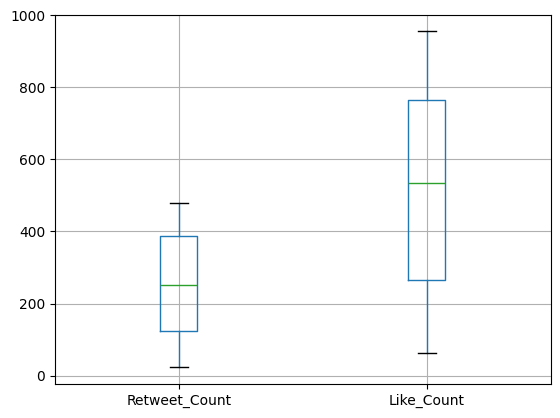

In [185]:
### checking outliers
print(tweets_df_capped.describe())
tweets_df_capped.boxplot()
plt.show()

Changing Retweet Count and Like Count to of Integer Datatype

In [186]:
tweets_df_capped[['Retweet_Count','Like_Count']] = tweets_df_capped[['Retweet_Count','Like_Count']].astype(int)

In [187]:
tweets_df_capped.head(20)
print(tweets_df_capped.info())

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 509
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tweet_Date     475 non-null    datetime64[ns]
 1   Tweet_Text     475 non-null    object        
 2   Retweet_Count  475 non-null    int32         
 3   Like_Count     475 non-null    int32         
 4   Hashtags       475 non-null    object        
dtypes: datetime64[ns](1), int32(2), object(2)
memory usage: 18.6+ KB
None


Sorting Tweets Based on Date

In [188]:
tweets_df_capped_sorted = tweets_df_capped.sort_values(by="Tweet_Date", ascending=True)
print(tweets_df_capped_sorted.head(30))

   Tweet_Date                   Tweet_Text  Retweet_Count  Like_Count Hashtags
0  2021-01-01  Tweet about MachineLearning            204         271      #ml
1  2021-01-01     Tweet about DeepLearning             46         306    #tech
2  2021-01-01           Tweet about Python            233         101      #ml
3  2021-01-02     Tweet about DeepLearning            298         203  #python
4  2021-01-03      Tweet about DataScience            376         502  #python
5  2021-01-04               Tweet about AI            183         123      #ai
6  2021-01-05               Tweet about AI            121         325      #ai
7  2021-01-06      Tweet about DataScience            440         331    #data
8  2021-01-06           Tweet about Python            190         316    #data
9  2021-01-06  Tweet about MachineLearning            443         133    #tech
11 2021-01-07     Tweet about DeepLearning            400         786  #python
10 2021-01-07  Tweet about MachineLearning          

##################### Functions #####################

Filtering Tweets based on Keyword

In [189]:
def filter_tweets(df, keyword):
    if not df.empty:
        result = df[df["Tweet_Text"].str.contains(keyword, case=False)]
        return result
    else:
        raise ValueError("Warning: No tweets found in the dataframe")


filtered_data = filter_tweets(tweets_df_capped_sorted, "deeplearning")


##### checking returned dataframe
print(filtered_data)

    Tweet_Date                Tweet_Text  Retweet_Count  Like_Count Hashtags
1   2021-01-01  Tweet about DeepLearning             46         306    #tech
3   2021-01-02  Tweet about DeepLearning            298         203  #python
11  2021-01-07  Tweet about DeepLearning            400         786  #python
13  2021-01-10  Tweet about DeepLearning            118         955  #python
15  2021-01-11  Tweet about DeepLearning             23         893  #python
..         ...                       ...            ...         ...      ...
473 2021-12-09  Tweet about DeepLearning             23         583      #ml
483 2021-12-18  Tweet about DeepLearning            437         427  #python
488 2021-12-20  Tweet about DeepLearning             69         773    #data
489 2021-12-23  Tweet about DeepLearning            137         894  #python
495 2021-12-25  Tweet about DeepLearning            220         211    #tech

[118 rows x 5 columns]


Building a Function the Calculates both Retweet Counts and Like Counts Means

In [190]:
##### multiple return values, default arguments and Handling Errors done
def avg_retweets_and_likes_count_by_range(df, start_date='2021-01-01', end_date='2021-12-25'):
    # Validate dates
    if pd.to_datetime(start_date) > pd.to_datetime(end_date):
        raise ValueError("Start date must be before or equal to the end date.")

    # Ensure the column exists and calculate the average
    ranged_df = df[(df['Tweet_Date'] >= start_date) & (df['Tweet_Date'] <= end_date)]
    if not ranged_df.empty:  # Check if there are any tweets in the range
        average_retweet = ranged_df['Retweet_Count'].mean().round(0)
        average_like = ranged_df['Like_Count'].mean().round(0)
        return average_retweet, average_like
    else:
        print(f"Warning: No tweets found within the specified date range.")
        return None

# Example usage
average_retweet_counts, average_Like_counts = avg_retweets_and_likes_count_by_range(tweets_df_capped_sorted, '2021-01-01', '2021-01-07')
print("Average retweet counts is: " + str(average_retweet_counts) + " and Average Like counts is: " + str(average_Like_counts))

Average retweet counts is: 284.0 and Average Like counts is: 318.0


Building a Function to calculate Average Retweets or Likes counts by Date Range based on what column sent

In [191]:
def avg_retweets_or_likes_count_by_range(df, column, start_date='2021-01-01', end_date='2021-12-25'):
    # Validate dates
    if pd.to_datetime(start_date) > pd.to_datetime(end_date):
        raise ValueError("Start date must be before or equal to the end date.")

    # Ensure the column exists and calculate the average
    if column in df.columns:
        ranged_df = df[(df['Tweet_Date'] >= start_date) & (df['Tweet_Date'] <= end_date)]
        if not ranged_df.empty:  # Check if there are any tweets in the range
            average = ranged_df[column].mean().round(0)
            return average
        else:
            print(f"Warning: No tweets found within the specified date range.")
            return None
    else:
        print(f"Error: Column '{column}' not found in the DataFrame.")
        return None

# Example usage
average_retweet_counts = avg_retweets_or_likes_count_by_range(tweets_df_capped_sorted, 'Retweet_Count', '2021-01-01', '2021-01-07')
print(average_retweet_counts)

print(tweets_df_capped_sorted)
average_retweet_counts = avg_retweets_or_likes_count_by_range(tweets_df_capped_sorted, 'Retweet_Count')
average_Like_counts = avg_retweets_or_likes_count_by_range(tweets_df_capped_sorted, 'Like_Count')
print("Average retweet counts is: " + str(average_retweet_counts) + " and Average Like counts is: " + str(average_Like_counts))

284.0
    Tweet_Date                   Tweet_Text  Retweet_Count  Like_Count  \
0   2021-01-01  Tweet about MachineLearning            204         271   
1   2021-01-01     Tweet about DeepLearning             46         306   
2   2021-01-01           Tweet about Python            233         101   
3   2021-01-02     Tweet about DeepLearning            298         203   
4   2021-01-03      Tweet about DataScience            376         502   
..         ...                          ...            ...         ...   
494 2021-12-25  Tweet about MachineLearning            417          61   
496 2021-12-27  Tweet about MachineLearning            403         407   
497 2021-12-28           Tweet about Python            335         357   
498 2021-12-29  Tweet about MachineLearning             29         951   
499 2021-12-30               Tweet about AI            471         239   

    Hashtags  
0        #ml  
1      #tech  
2        #ml  
3    #python  
4    #python  
..       ...  


In [192]:
temp_list = tweets_df_capped_sorted['Tweet_Text']
print(temp_list)

0      Tweet about MachineLearning
1         Tweet about DeepLearning
2               Tweet about Python
3         Tweet about DeepLearning
4          Tweet about DataScience
                  ...             
494    Tweet about MachineLearning
496    Tweet about MachineLearning
497             Tweet about Python
498    Tweet about MachineLearning
499                 Tweet about AI
Name: Tweet_Text, Length: 475, dtype: object


############### Iterators and List Comprehensions ###############

Count Keyword occurences function

In [193]:
def count_keyword(df, keyword):
    if not df.empty:
        count = 0
        temp_list = df['Tweet_Text']
        for key in temp_list:
            if keyword.lower() in key.lower():
                count+=1
    return count


python_count = count_keyword(tweets_df_capped_sorted, 'deeplearning')
print(python_count)

118


Create a List of Hashtags from the tweet texts

In [194]:
hashtag_list = ["#"+tweet.strip().replace(" ","") for tweet in tweets_df_capped_sorted['Tweet_Text']]
print(hashtag_list)

['#TweetaboutMachineLearning', '#TweetaboutDeepLearning', '#TweetaboutPython', '#TweetaboutDeepLearning', '#TweetaboutDataScience', '#TweetaboutAI', '#TweetaboutAI', '#TweetaboutDataScience', '#TweetaboutPython', '#TweetaboutMachineLearning', '#TweetaboutDeepLearning', '#TweetaboutMachineLearning', '#TweetaboutDataScience', '#TweetaboutDeepLearning', '#TweetaboutPython', '#TweetaboutDeepLearning', '#TweetaboutPython', '#TweetaboutMachineLearning', '#TweetaboutDataScience', '#TweetaboutPython', '#TweetaboutDeepLearning', '#TweetaboutPython', '#TweetaboutMachineLearning', '#TweetaboutAI', '#TweetaboutMachineLearning', '#TweetaboutDeepLearning', '#TweetaboutMachineLearning', '#TweetaboutMachineLearning', '#TweetaboutDeepLearning', '#TweetaboutDataScience', '#TweetaboutDataScience', '#TweetaboutMachineLearning', '#TweetaboutAI', '#TweetaboutMachineLearning', '#TweetaboutPython', '#TweetaboutDeepLearning', '#TweetaboutDataScience', '#TweetaboutDataScience', '#TweetaboutPython', '#Tweetabout

############### Lambda Functions and Scoping ###############

Extracting Year from Tweet_Date

In [195]:
######### As the tweet date column is of datatype datetime panda series. we could Access year directly
extract_year = lambda x: x.year
tweets_df_capped_sorted['Tweet_Year'] = tweets_df_capped_sorted['Tweet_Date'].apply(extract_year)

print(tweets_df_capped_sorted['Tweet_Year'])

0      2021
1      2021
2      2021
3      2021
4      2021
       ... 
494    2021
496    2021
497    2021
498    2021
499    2021
Name: Tweet_Year, Length: 475, dtype: int64


In [196]:
tweets_df_capped_sorted.head(20)

,Tweet_Date,Tweet_Text,Retweet_Count,Like_Count,Hashtags,Tweet_Year
0,2021-01-01,Tweet about MachineLearning,204,271,#ml,2021
1,2021-01-01,Tweet about DeepLearning,46,306,#tech,2021
2,2021-01-01,Tweet about Python,233,101,#ml,2021
3,2021-01-02,Tweet about DeepLearning,298,203,#python,2021
4,2021-01-03,Tweet about DataScience,376,502,#python,2021
5,2021-01-04,Tweet about AI,183,123,#ai,2021
6,2021-01-05,Tweet about AI,121,325,#ai,2021
7,2021-01-06,Tweet about DataScience,440,331,#data,2021
8,2021-01-06,Tweet about Python,190,316,#data,2021
9,2021-01-06,Tweet about MachineLearning,443,133,#tech,2021


Extracting Keywords from Tweet_text column

In [197]:
#tweets_df_capped_sorted['tweet_Keyword'] = tweets_df_capped_sorted['Tweet_Text'][13:]
#print(tweets_df_capped_sorted['tweet_Keyword'])

def add_keyword_column(df):
  df['tweet_Keyword'] = df['Tweet_Text'].apply(lambda x: x[12:] if len(x) > 12 else np.nan)
  return df

tweets_df_capped_sorted = add_keyword_column(tweets_df_capped_sorted.copy())

In [198]:
tweets_df_capped_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 475 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Tweet_Date     475 non-null    datetime64[ns]
 1   Tweet_Text     475 non-null    object        
 2   Retweet_Count  475 non-null    int32         
 3   Like_Count     475 non-null    int32         
 4   Hashtags       475 non-null    object        
 5   Tweet_Year     475 non-null    int64         
 6   tweet_Keyword  475 non-null    object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 26.0+ KB


################## Exploratory Data Analysis ##################

rename our dataframe with simpler name and Exploring Data after cleansing

In [199]:
tweets_EDA = tweets_df_capped_sorted

In [200]:
tweets_EDA

,Tweet_Date,Tweet_Text,Retweet_Count,Like_Count,Hashtags,Tweet_Year,tweet_Keyword
0,2021-01-01,Tweet about MachineLearning,204,271,#ml,2021,MachineLearning
1,2021-01-01,Tweet about DeepLearning,46,306,#tech,2021,DeepLearning
2,2021-01-01,Tweet about Python,233,101,#ml,2021,Python
3,2021-01-02,Tweet about DeepLearning,298,203,#python,2021,DeepLearning
4,2021-01-03,Tweet about DataScience,376,502,#python,2021,DataScience
...,...,...,...,...,...,...,...
494,2021-12-25,Tweet about MachineLearning,417,61,#data,2021,MachineLearning
496,2021-12-27,Tweet about MachineLearning,403,407,#data,2021,MachineLearning
497,2021-12-28,Tweet about Python,335,357,#tech,2021,Python
498,2021-12-29,Tweet about MachineLearning,29,951,#ml,2021,MachineLearning


Occurences during the whole year

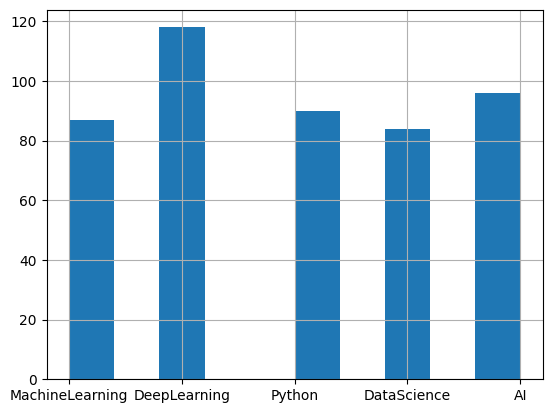

In [208]:
tweets_EDA['tweet_Keyword'].hist()
plt.show()

Occurences during specific Month

    Tweet_Date                   Tweet_Text  Retweet_Count  Like_Count  \
393 2021-10-01               Tweet about AI            449         581   
392 2021-10-01               Tweet about AI            452         481   
396 2021-10-02  Tweet about MachineLearning            178         644   
395 2021-10-02           Tweet about Python             74         324   
397 2021-10-02     Tweet about DeepLearning             53         598   
398 2021-10-03  Tweet about MachineLearning             39         172   
399 2021-10-04               Tweet about AI            291         348   
400 2021-10-05     Tweet about DeepLearning             23         819   
401 2021-10-06           Tweet about Python            480         616   
402 2021-10-07           Tweet about Python             64         831   

    Hashtags  Tweet_Year    tweet_Keyword  
393      #ai        2021               AI  
392    #data        2021               AI  
396  #python        2021  MachineLearning  
395      

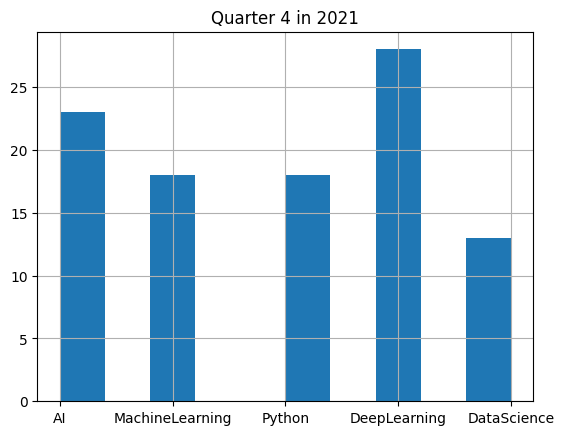

In [236]:
def select_range_for_plotting(df,Start_Date='2021-01-01', End_Date='2021-12-30'):
    if pd.to_datetime(Start_Date) > pd.to_datetime(End_Date):
        raise ValueError("Start date must be before or equal to the end date.")
    filter_dataframe_by_period = df[(df['Tweet_Date']>= pd.to_datetime(Start_Date)) & (df['Tweet_Date']<=pd.to_datetime(End_Date))]
    if not filter_dataframe_by_period.empty:
        return filter_dataframe_by_period
    else: 
        print(f"Warning: No tweets found within the specified date range.")
        return None


filtered_data = select_range_for_plotting(tweets_EDA,'2021-10-01','2021-12-30')
print(filtered_data.head(10))
filtered_data['tweet_Keyword'].hist()
plt.title("Quarter 4 in 2021")
plt.show()